### TensorFlow 2.x MNIST Classification with DNN: Regularization Techniques and Learning Rate Scheduling

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import numpy as np

#### Load the dataset and split into training, testing and prepocessing of data

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28*28))/255.0
test_images = test_images.reshape((10000, 28*28))/255.0

#### Sample MNIST Images with Labels

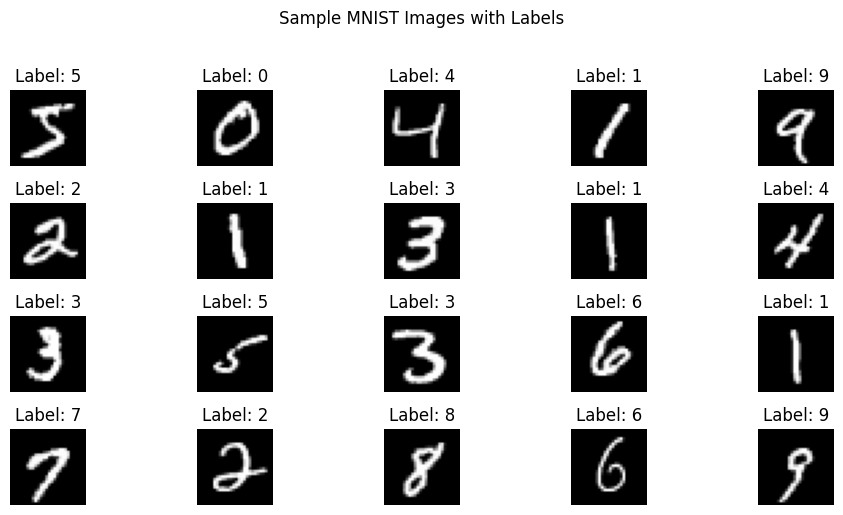

In [3]:
plt.figure(figsize=(10,5))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(train_images[i].reshape(28,28),cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')
plt.suptitle('Sample MNIST Images with Labels',y=1.02)
plt.tight_layout()
plt.show()

#### Function to compile and train both the models

In [ ]:
def compile_and_trainModel(model):
    
    early_stop = EarlyStopping(
        monitor='val_loss',    # Watch validation loss
        patience=3,            # Stop if no improvement for 3 epochs
        restore_best_weights=True  # Restore weights from the best epoch
    )

    lr_scheduler = ReduceLROnPlateau(
        monitor='val_loss',    # Watch validation loss
        factor=0.5,            # Reduce LR by half
        patience=2,            # After 2 epochs of no improvement
        min_lr=1e-6,           # Do not go below this learning rate
        verbose=1
    )

    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
    )

    history = model.fit(    
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_data=(test_images, test_labels),
    callbacks=[early_stop, lr_scheduler]
    )

    return history

In [6]:
model1 = models.Sequential([
    layers.Dense(1024, activation='relu', input_shape=(28*28,)),
    layers.Dropout(0.6),
    layers.Dense(128, activation='swish', kernel_regularizer=regularizers.l1(0.001)),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l1(0.001)),
    layers.Dropout(0.1),
    layers.Dense(10, activation='softmax')
])


C:\Users\archi\OneDrive\Documents\Coding\Python\Assignments\.venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model2 = models.Sequential([
    layers.Dense(1024, activation='relu', input_shape=(28*28,)),
    layers.Dropout(0.6),
    layers.Dense(128, activation='swish', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.1),
    layers.Dense(10, activation='softmax')
])


In [8]:
history1 = compile_and_trainModel(model1)
history2 = compile_and_trainModel(model2)

Epoch 1/20
1715/1715 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.8168 - loss: 2.2369 - val_accuracy: 0.9473 - val_loss: 0.5396 - learning_rate: 0.0010
Epoch 2/20
1715/1715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9251 - loss: 0.5981 - val_accuracy: 0.9546 - val_loss: 0.4489 - learning_rate: 0.0010
Epoch 3/20
1715/1715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9377 - loss: 0.4969 - val_accuracy: 0.9628 - val_loss: 0.3801 - learning_rate: 0.0010
Epoch 4/20
1715/1715 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9448 - loss: 0.4452 - val_accuracy: 0.9628 - val_loss: 0.3652 - learning_rate: 0.0010
Epoch 5/20
1715/1715 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.9491 - loss: 0.4127 - val_accuracy: 0.9687 - val_loss: 0.3272 - learning_rate: 0.0010
Epoch 6/20
1715/1715 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9507 - loss: 0.3933 - val_accuracy: 0.9647 - val_loss: 0.3297 - learning_rate: 0.0010
Epoch 7/20
1708/1715 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9

#### Model 1 Accuracy and Loss

In [15]:
test_loss, test_acc = model1.evaluate(test_images, test_labels)
print(f"\nTest Accuracy: {test_acc:.4f}\nTest Loss: {test_loss:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9736 - loss: 0.2075

Test Accuracy: 0.9776
Test Loss: 0.1938


#### Model 2 Accuracy and Loss

In [16]:
test_loss, test_acc = model2.evaluate(test_images, test_labels)
print(f"\nTest Accuracy: {test_acc:.4f}\nTest Loss: {test_loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9784 - loss: 0.1110

Test Accuracy: 0.9819
Test Loss: 0.0977


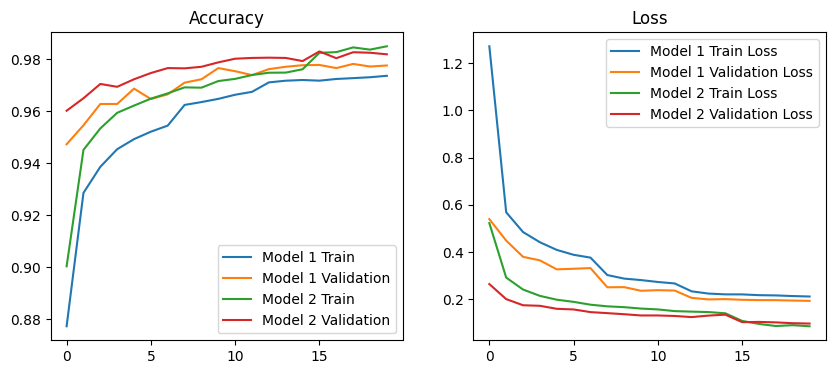

In [18]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history1.history['accuracy'], label='Model 1 Train')
plt.plot(history1.history['val_accuracy'], label='Model 1 Validation')
plt.plot(history2.history['accuracy'], label='Model 2 Train')
plt.plot(history2.history['val_accuracy'], label='Model 2 Validation')
plt.title("Accuracy")
plt.legend()

# plt.figure(figsize=(10,4))
plt.subplot(1,2,2)
plt.plot(history1.history['loss'], label='Model 1 Train Loss')
plt.plot(history1.history['val_loss'], label='Model 1 Validation Loss')
plt.plot(history2.history['loss'], label='Model 2 Train Loss')
plt.plot(history2.history['val_loss'], label='Model 2 Validation Loss')
plt.title("Loss")
plt.legend()

| Feature                        | Model 1                           | Model 2                           |
|-------------------------------|------------------------------------|------------------------------------|
| Regularization Type           | L1 Regularization (`l1=0.001`)     | L2 Regularization (`l2=0.001`)     |
| Hidden Layers                 | 3 (1024, 128, 64 units)            | 3 (1024, 128, 64 units)            |
| Activation Functions          | ReLU, Swish, ReLU                  | ReLU, Swish, ReLU                  |
| Dropout Rates                 | 0.6, 0.2, 0.1                      | 0.6, 0.2, 0.1                      |
| Output Activation             | Softmax                           | Softmax                           |
| Loss Function                 | Sparse Categorical Crossentropy   | Sparse Categorical Crossentropy   |
| Optimizer                     | Adam                              | Adam                              |
| EarlyStopping Used            | Yes                                | Yes                               |
| Learning Rate Scheduler Used | Yes, `ReduceLROnPlateau`                              | Yes, `ReduceLROnPlateau`                                |
| Regularized Layers            | 128-unit and 64-unit dense layers | 128-unit and 64-unit dense layers |                                                        |
| Effect of Regularization | Encourages sparsity (zeros in weights); can help in feature selection but may underfit if overused | Encourages small weights; leads to smoother models and typically better generalization |                                                              |                                                                               |
| Test Accuracy | Slightly lower, as L1 can cause underfitting                                                       | Slightly higher, due to better generalization                                          |
| Test Loss      | Higher than Model 2 due to potential underfitting                                                  | Lower than Model 1 due to regularized smoothing                                        |



#### Performance Analysis


Model 1: With L1 Regularization<br>

**Test Accuracy**: 97.76 %<br>
**Test Loss**: 2.24 %

Model 2: With L2 Regularization<br>

**Test Accuracy**: 98.19 %<br>
**Tess Loss**: 1.81 %


Both models use a Deep Neural Network (DNN) for MNIST classification. They share a similar architecture with 3 hidden layers (1024, 128, and 64 units) and use ReLU, Swish, and ReLU activation functions for the hidden layers, respectively, and `Softmax` for the output layer. `Sparse Categorical Crossentropy` is used as the loss function, and `Adam` is the optimizer. Both models also incorporate `EarlyStopping` and a Learning Rate Scheduler.


Based on the test accuracy and test loss, Model 2 (With L2 Regularization) is the better model.

Higher Test Accuracy: Model 2 achieved a test accuracy of 98.19 %, which is slightly higher than Model 1's 97.76 %.
Lower Test Loss: More significantly, Model 2 demonstrated a lower test loss of 0.0977 compared to Model 1's 0.1938. A lower test loss indicates that the model's predictions are closer to the actual values on unseen data.